In [1]:
import scanpy
adata = scanpy.read_h5ad('./data/PDAC/st_A.h5ad')
adata.var_names_make_unique()

In [2]:
import ctdecon as ctd
ctd.preprocess(adata)
ctd.spot_graph(adata, is_sparse=False)
ctd.contrast(adata)

In [3]:
adata_sc = scanpy.read('./data/PDAC/sc_A.h5ad')
adata_sc.var_names_make_unique()

In [4]:
ctd.preprocess(adata_sc)

/home/data1/linjing0806/anaconda3/envs/pytorch_gpu/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [5]:
adata, adata_sc = ctd.overlap_gene(adata, adata_sc)

Number of overlap genes: 852


/home/data1/linjing0806/ctdecon/ctdecon/reference.py:24: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["overlap_genes"] = genes
/home/data1/linjing0806/ctdecon/ctdecon/reference.py:25: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_sc.uns["overlap_genes"] = genes


In [6]:
ctd.get_feature(adata, deconvolution=True)

/home/data1/linjing0806/ctdecon/ctdecon/adata_utils.py:67: ImplicitModificationWarning: Setting element `.obsm['feat']` of view, initializing view as actual.
  adata.obsm['feat'] = feat


In [7]:
model = ctd.config(adata, adata_sc, epochs=1200, random_seed=50, deconvolution=True, is_sparse=True)
adata, adata_sc = model.train_map()

Start training spatial transcriptomics data...


100%|██████████| 1200/1200 [00:41<00:00, 28.76it/s]


End training for spatial transcriptomics data.
Start training scRNA-seq data...


100%|██████████| 1200/1200 [00:04<00:00, 250.35it/s]


End learning for cell representation.
Start learning mapping matrix...


100%|██████████| 1200/1200 [00:10<00:00, 117.53it/s]

End learning mapping matrix.


In [8]:
adata_sc

AnnData object with n_obs × n_vars = 1926 × 852
    obs: 'label'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'marker', 'marker_cor', 'hvg', 'overlap_genes'
    obsm: 'emb_sc'

In [10]:
# adata_sc.obs['label'] = adata_sc.obs['celltype2'] # MOB
# adata_sc.obs['label'] = adata_sc.obs['Subset'] # HLN
ctd.cell2spot(adata, adata_sc, retain_percent=0.15)

In [11]:
adata

AnnData object with n_obs × n_vars = 426 × 852
    obs: 'region', 'Acinar_cells', 'Cancer_clone_A', 'Cancer_clone_B', 'Ductal_APOL1_high-hypoxic', 'Ductal_CRISP3_high-centroacinar_like', 'Ductal_MHC_Class_II', 'Ductal_terminal_ductal_like', 'Endocrine_cells', 'Endothelial_cells', 'Fibroblasts', 'Macrophages_A', 'Macrophages_B', 'Mast_cells', 'Monocytes', 'RBCs', 'T_cells_&_NK_cells', 'Tuft_cells', 'mDCs_A', 'mDCs_B', 'pDCs'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cts_dom_A', 'cts_dom_B', 'cts_dom_P', 'spatial', 'hvg', 'log1p', 'overlap_genes'
    obsm: 'spatial', 'distance_matrix', 'graph_neigh', 'adjacent', 'contrastive_label', 'feat', 'feat_a', 'emb_sp', 'map_matrix'

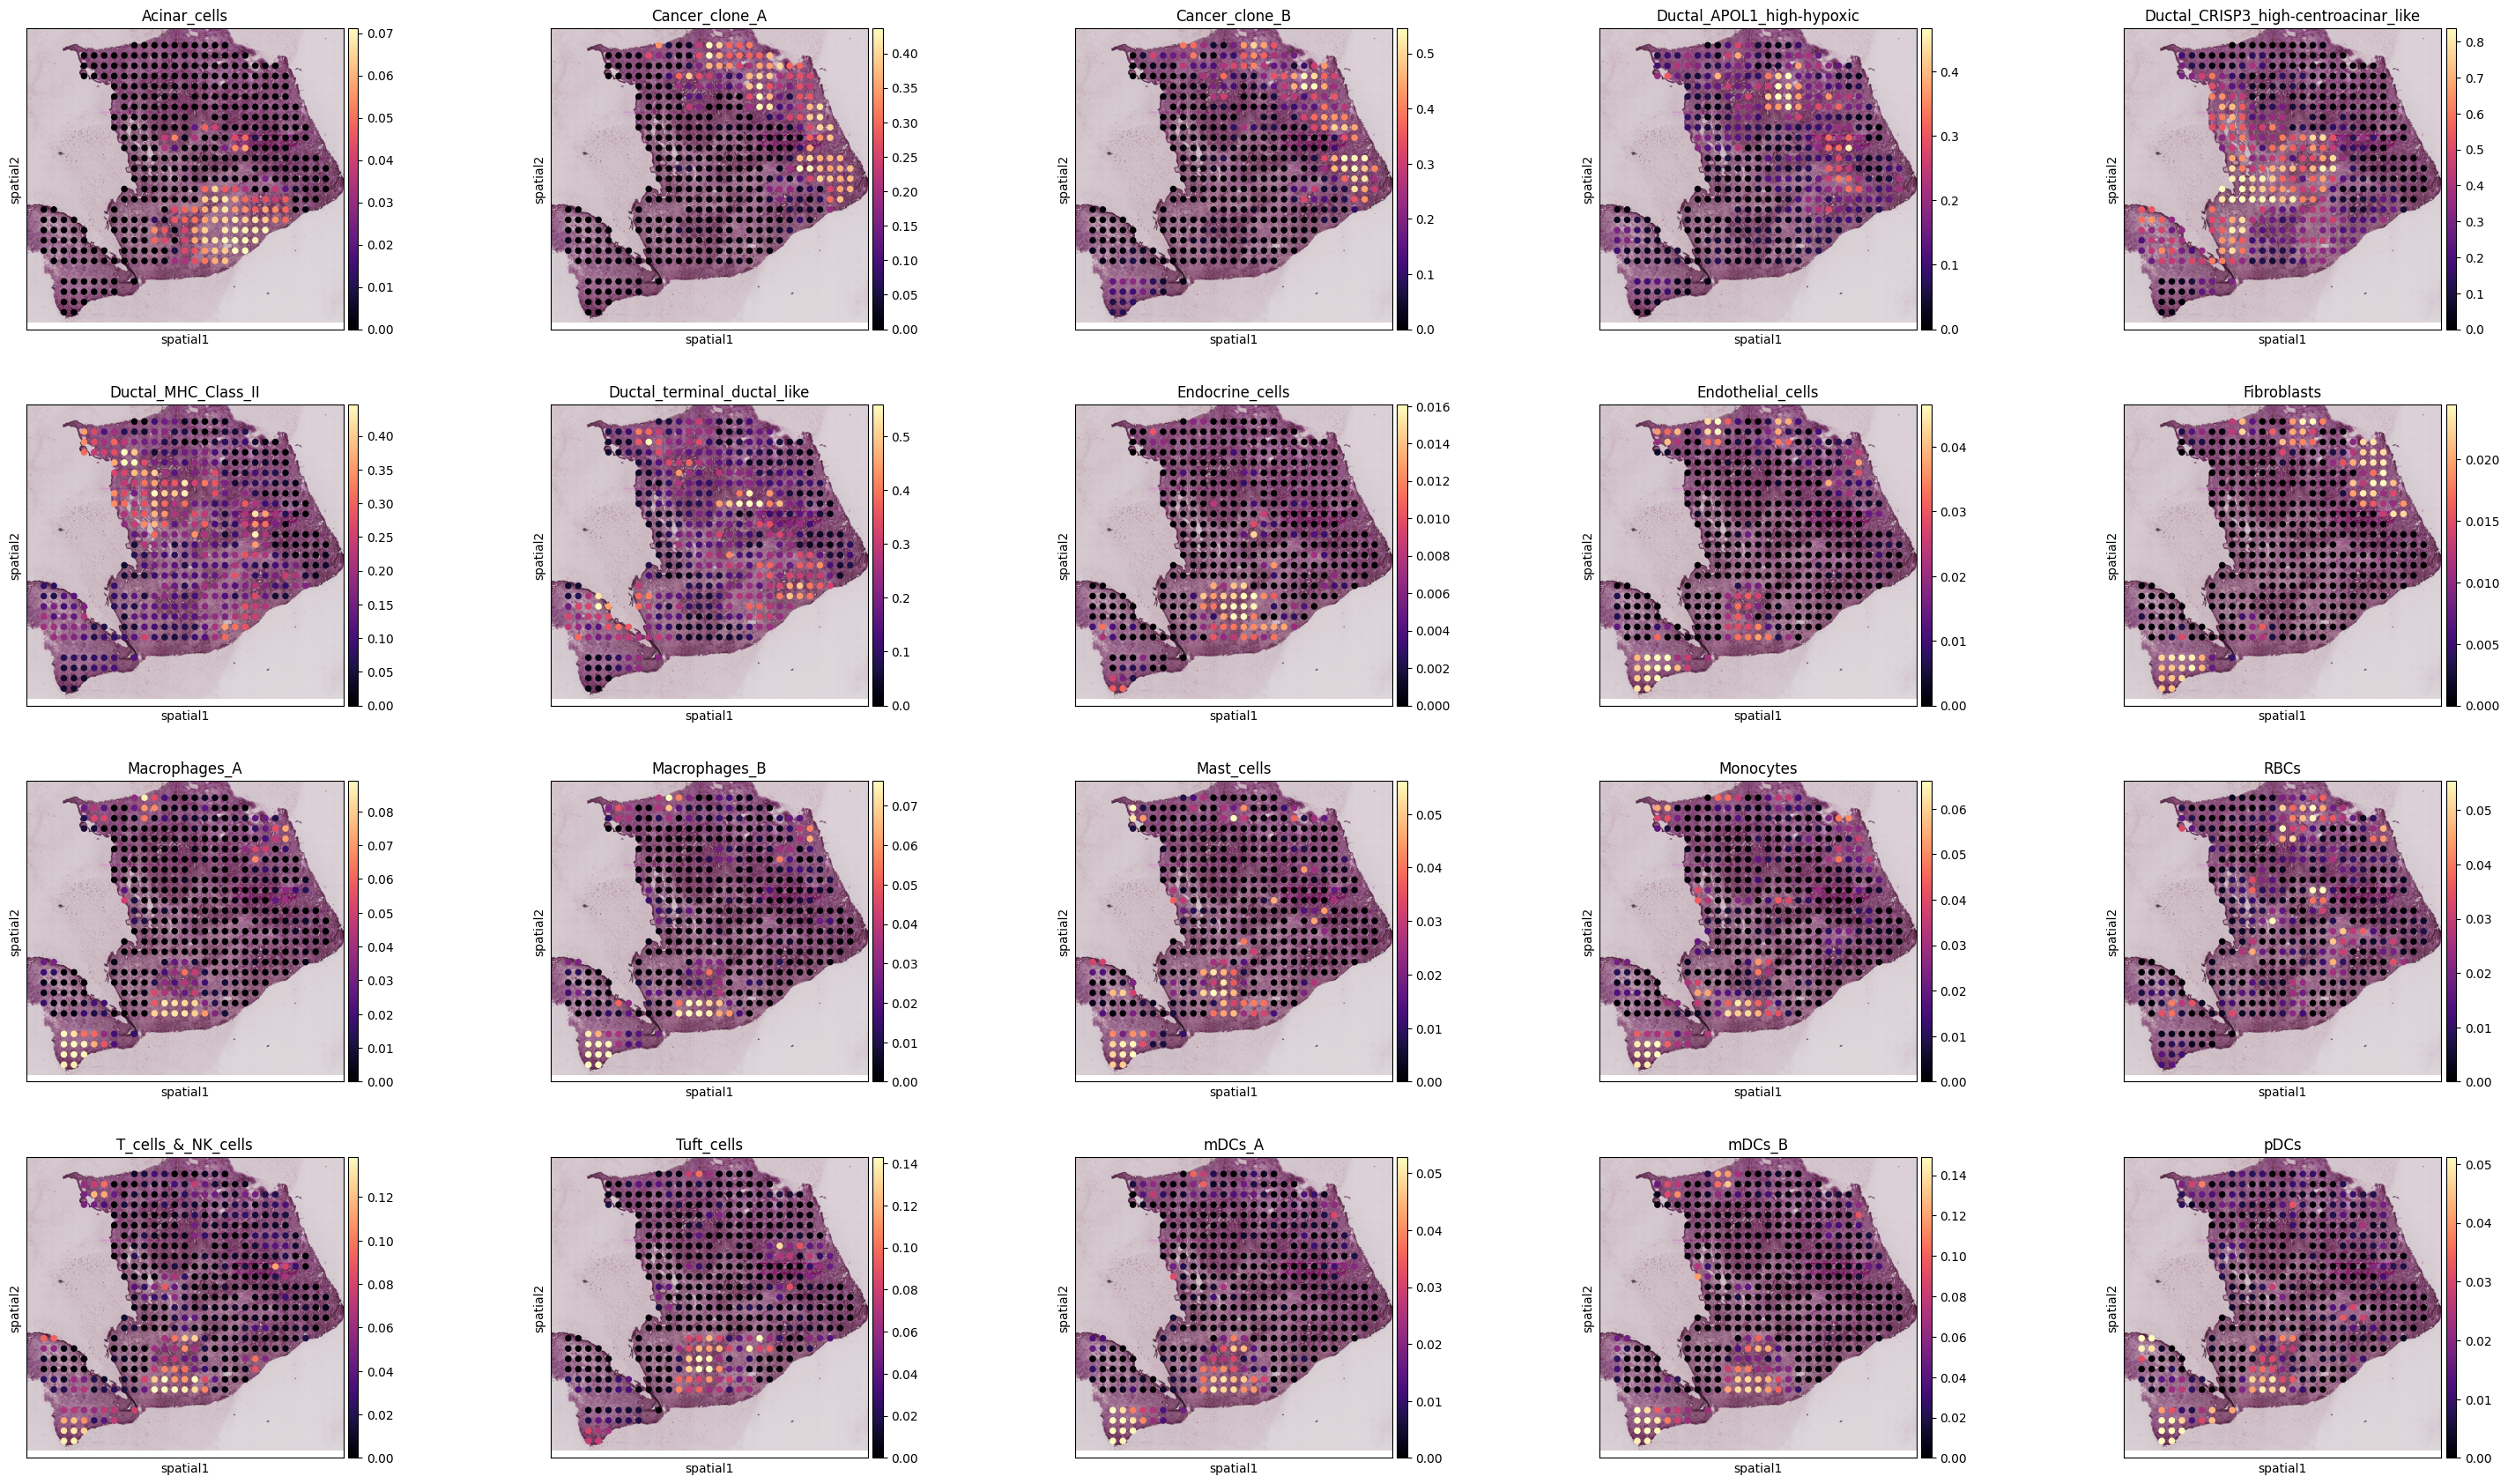

In [13]:
scanpy.pl.spatial(
        adata, 
        # spot_size=20,
        cmap='magma',
        # selected cell types
        color=['Acinar_cells', 'Cancer_clone_A', 'Cancer_clone_B', 'Ductal_APOL1_high-hypoxic', 'Ductal_CRISP3_high-centroacinar_like', 'Ductal_MHC_Class_II', 'Ductal_terminal_ductal_like', 'Endocrine_cells', 'Endothelial_cells', 'Fibroblasts', 'Macrophages_A', 'Macrophages_B', 'Mast_cells', 'Monocytes', 'RBCs', 'T_cells_&_NK_cells', 'Tuft_cells', 'mDCs_A', 'mDCs_B', 'pDCs'],
        ncols=5, size=1.3,
        img_key='hires',
        # limit color scale at 99.2% quantile of cell abundance
        vmin=0, vmax='p99.2',
        show=True
        )